# Create visuals for AI UK

Notebook creating supporting visuals for the AI UK exhibition.

In [1]:
import geopandas as gpd
import contextily 
import palettable.matplotlib as palmpl
import matplotlib.pyplot as plt
import mapclassify
import husl
import seaborn as sns

from utils import legendgram

/var/folders/2f/fhks6w_d0k556plcv3rfmshw0000gn/T/ipykernel_10824/2157996581.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
data_folder = "/Users/martin/Library/CloudStorage/OneDrive-SharedLibraries-TheAlanTuringInstitute/Daniel Arribas-Bel - demoland_data"

## Create a high DPI large map for the background

In [3]:
oa_aoi = gpd.read_parquet(f"{data_folder}/processed/interpolated/all_oa.parquet")

In [4]:
from shapely.geometry import box

bds = oa_aoi.total_bounds
extent = gpd.GeoSeries([box((bds[0] - 7000), bds[1], bds[2] + 7000, bds[3]+35000)], crs=oa_aoi.crs).to_crs(3857)

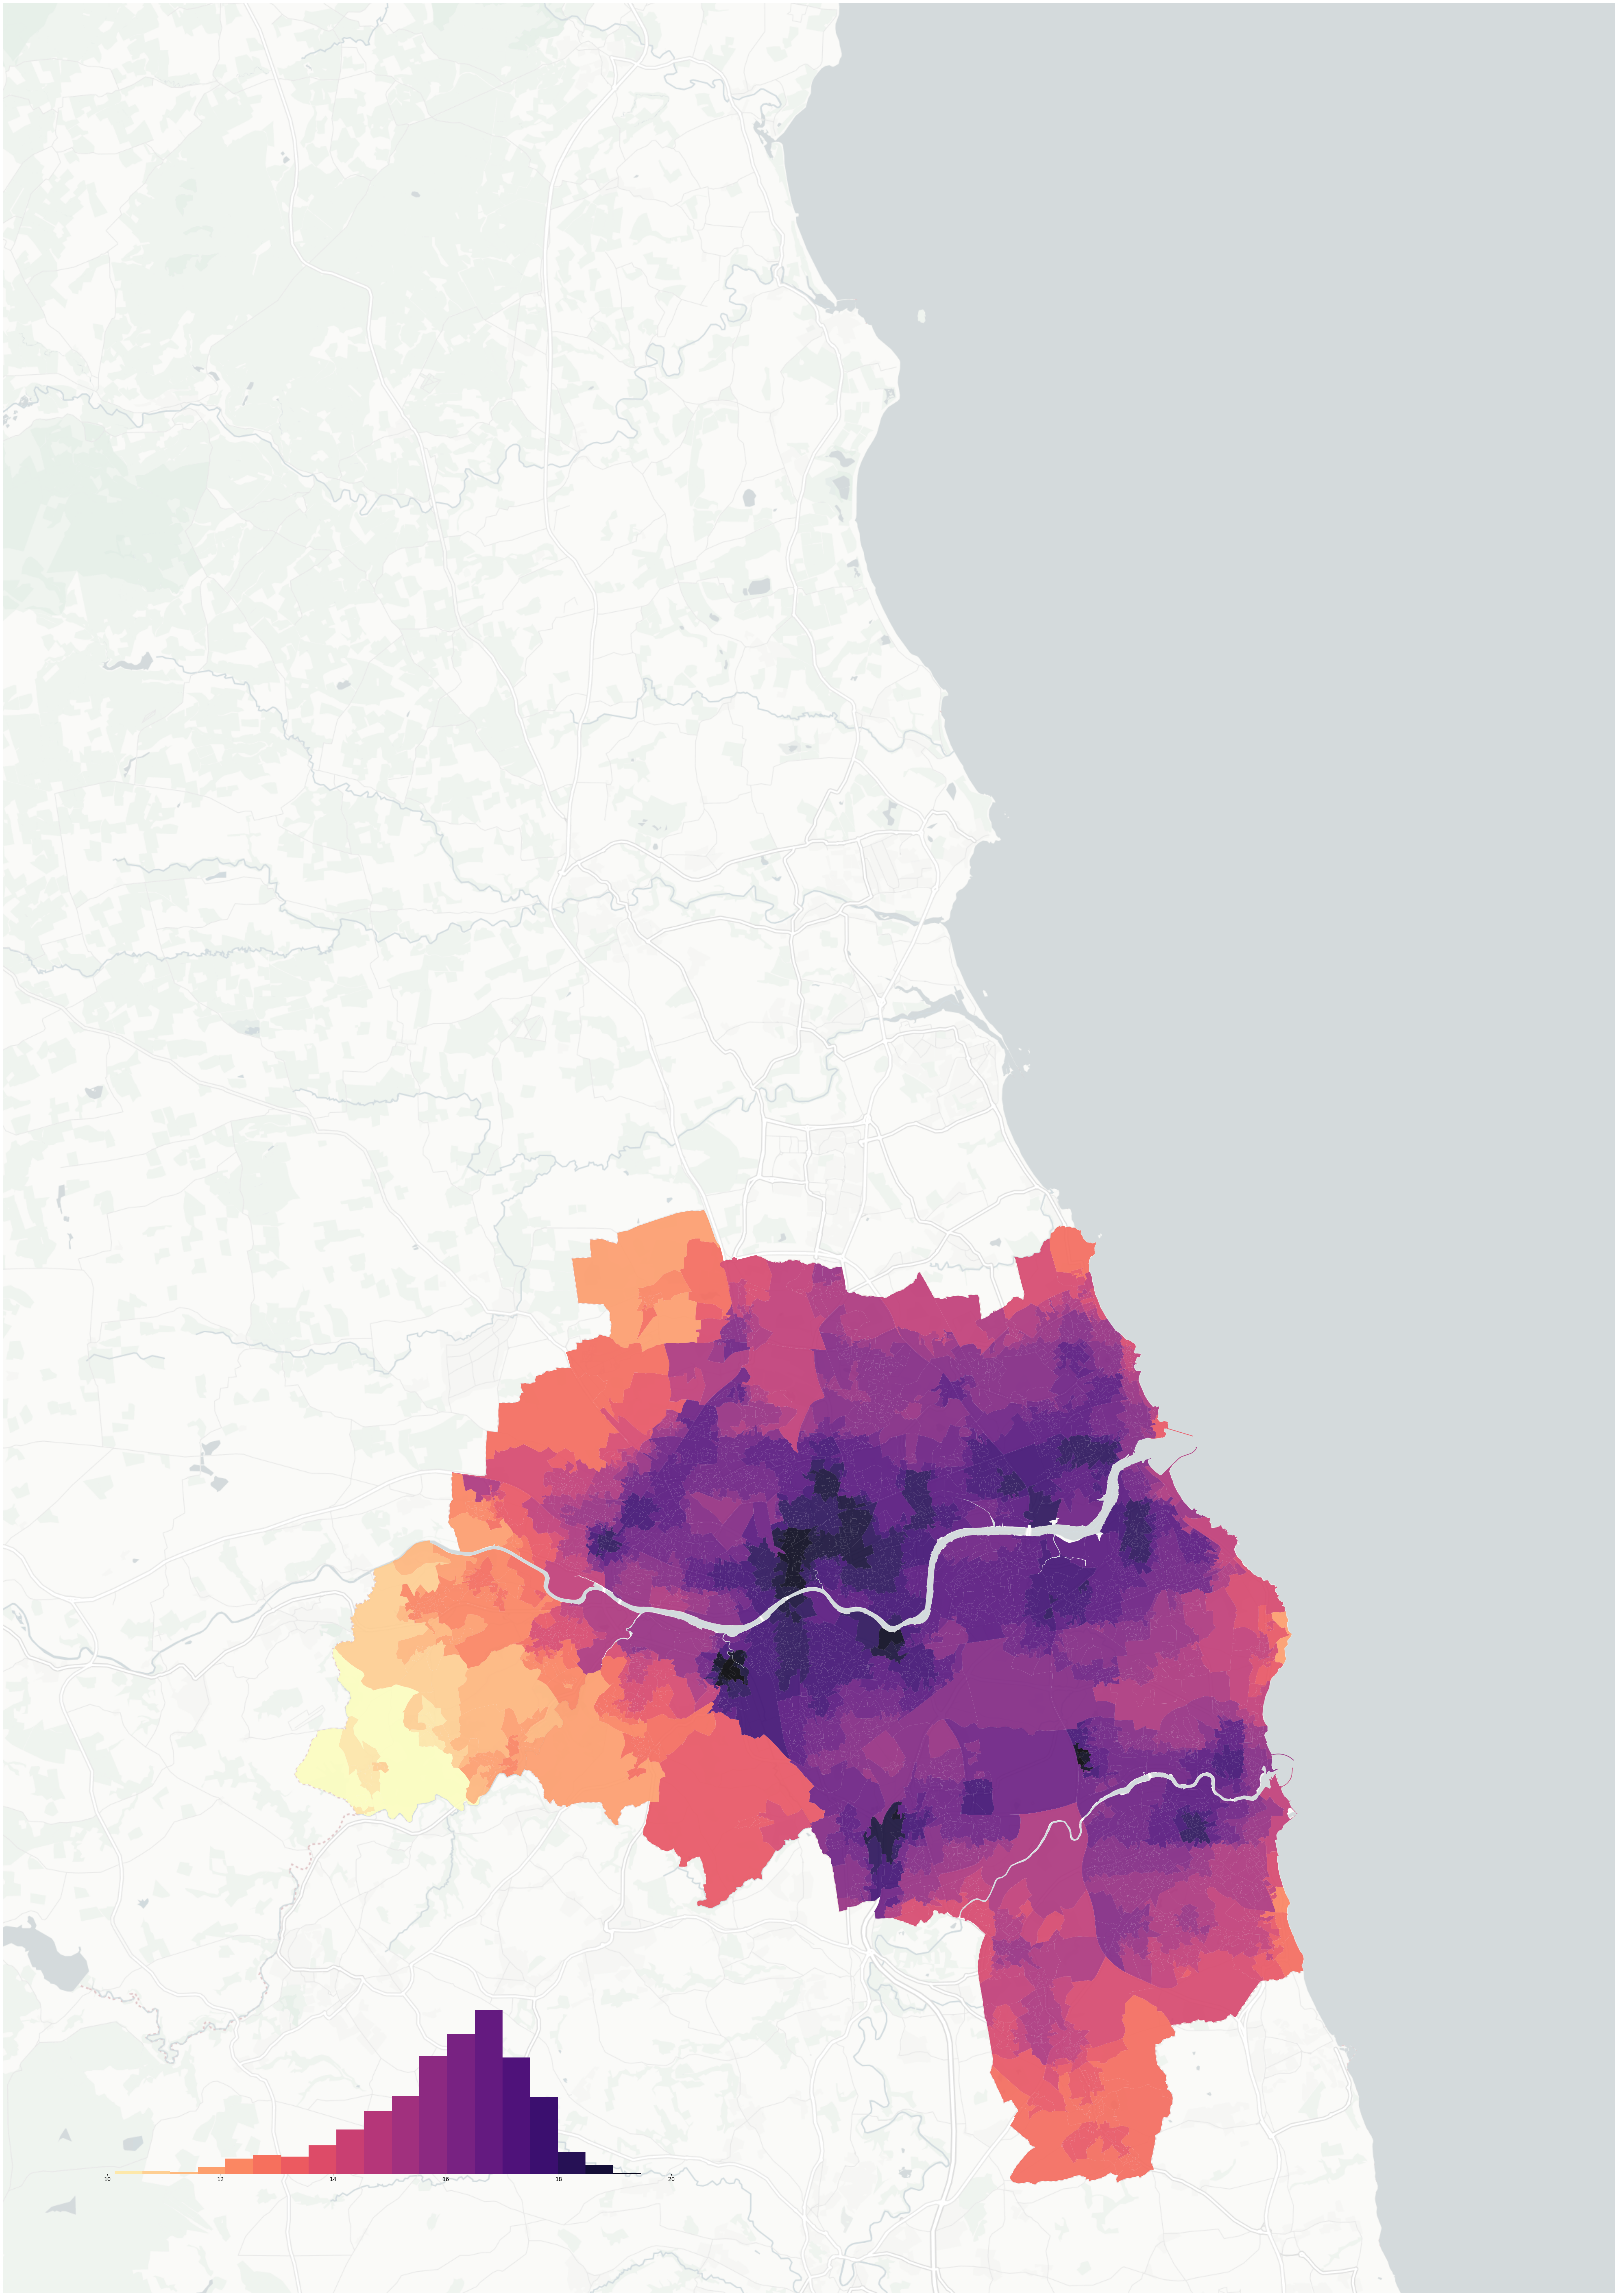

In [5]:
f,ax = plt.subplots(figsize=(90, 90))
extent.plot(ax=ax, alpha=0)
oa_aoi.to_crs(3857).plot("air_quality_index", scheme="equalinterval", k=20, ax=ax, alpha=.9, cmap="magma_r")
bins = mapclassify.EqualInterval(oa_aoi['air_quality_index'].values, k=20).bins
legendgram(
    f,
    ax,
    oa_aoi['air_quality_index'],
    bins,
    pal=palmpl.Magma_20_r,
    legend_size=(.35,.075), # legend size in fractions of the axis
    loc = 'lower left', # matplotlib-style legend locations
    clip = (10,20), # clip the displayed range of the histogram
)
ax.set_axis_off()
contextily.add_basemap(ax=ax, source=contextily.providers.CartoDB.PositronNoLabels.build_url(scale_factor="@2x"), attribution="")
# contextily.add_basemap(ax=ax, source=contextily.providers.Stamen.TonerLines.build_url(scale_factor="@2x"), alpha=.4, attribution="(C) CARTO, Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors")
# plt.savefig(f"../images/coast.png", dpi=100, bbox_inches="tight")
plt.savefig(f"../images/for_GC/coast.svg", dpi=144, bbox_inches="tight")

